<a href="https://colab.research.google.com/github/akanksha0911/Clustering-Techniques/blob/main/Clustering_Diff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**bold text**




In [7]:
# Importing Libs

from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from matplotlib import pyplot as plt
%matplotlib inline


**Uploading the data**

In [8]:
df = pd.read_csv("/content/drive/MyDrive/Kaggle_data/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Data Visualization


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



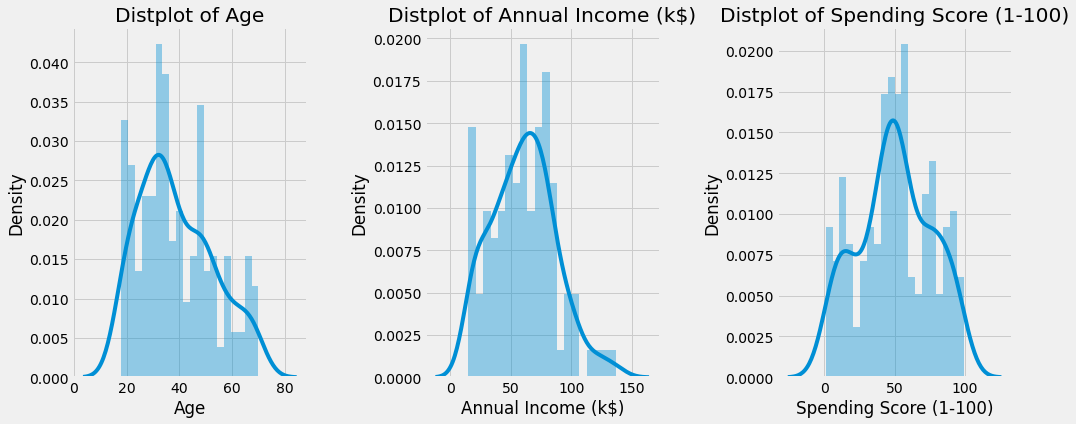

In [11]:
# Histograms

# plt.style.use('fivethirtyeight')

plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

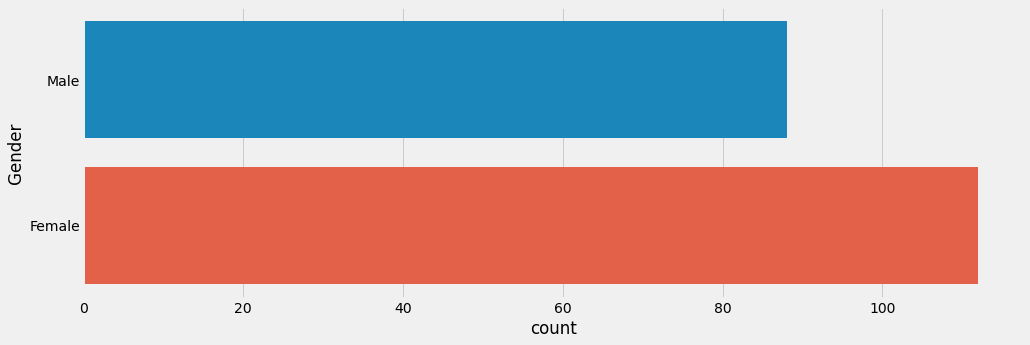

In [12]:
# Count Plot of Gender

plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

## **K-Means clustering**


Using Elbow Method to find Optimal value of K (number of clusters).
Here, WCSS stands for Within-Cluster Sum of Square

In [17]:


wcss = [] #empty array
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df[['Age','Annual Income (k$)']])
    wcss.append(kmeans.inertia_)


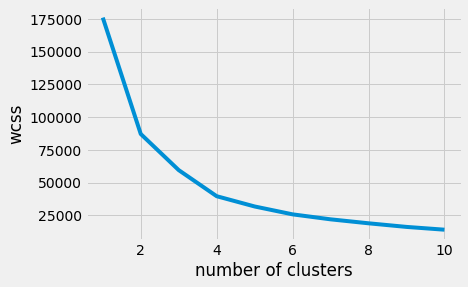

In [18]:
#plotting graph
plt.plot(range(1,11), wcss)
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

The bend (or elbow) here at K=5 indicates the optimal number of cluster

In [27]:
# Preprocessing using min max scaler

scaler = MinMaxScaler()

scaler.fit(df[['Annual Income (k$)']])
df['Annual Income (k$)'] = scaler.transform(df[['Annual Income (k$)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,0.019231,0.000000,39
1,2,Male,0.057692,0.000000,81
2,3,Female,0.038462,0.008197,6
3,4,Female,0.096154,0.008197,77
4,5,Female,0.250000,0.016393,40


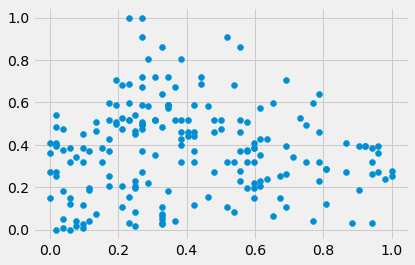

In [28]:
plt.scatter(df.Age,df['Annual Income (k$)'])

In [33]:
kmeans = KMeans(n_clusters=5, init = "k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(df[['Age','Annual Income (k$)']])
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       4, 1, 2, 1, 4, 1, 1, 1, 2, 1, 2, 1, 4, 1, 4, 1, 1, 1, 2, 1, 4, 1,
       4, 1, 4, 1, 1, 1, 4, 1, 1, 2, 4, 4, 4, 2, 1, 2, 2, 3, 2, 2, 2, 3,
       4, 2, 3, 1, 2, 4, 2, 2, 2, 3, 4, 4, 3, 4, 2, 4, 2, 4, 3, 4, 2, 3,
       3, 4, 2, 3, 4, 4, 3, 3, 4, 3, 4, 3, 3, 4, 2, 3, 4, 3, 2, 4, 2, 2,
       2, 3, 4, 3, 3, 3, 2, 4, 4, 4, 3, 4, 4, 4, 3, 3, 4, 4, 2, 4, 4, 4,
       3, 3, 3, 3, 4, 3, 3, 0, 2, 3, 3, 3, 3, 3, 4, 3, 0, 0, 4, 0, 4, 0,
       4, 3, 0, 3, 0, 3, 2, 3, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0,
       2, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [34]:
df['cluster']=y_kmeans
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,0.019231,0.000000,39,1
1,2,Male,0.057692,0.000000,81,1
2,3,Female,0.038462,0.008197,6,1
3,4,Female,0.096154,0.008197,77,1
4,5,Female,0.250000,0.016393,40,1


In [35]:
kmeans.cluster_centers_

array([[0.34319527, 0.67087011],
       [0.18885602, 0.10844893],
       [0.83846154, 0.29648712],
       [0.13414634, 0.42602959],
       [0.534699  , 0.35762651]])

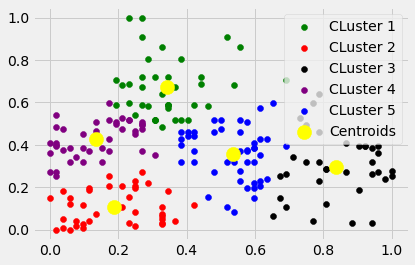

In [44]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
plt.scatter(df1.Age,df1['Annual Income (k$)'],color='green', label = 'CLuster 1')
plt.scatter(df2.Age,df2['Annual Income (k$)'],color='red', label = 'CLuster 2')
plt.scatter(df3.Age,df3['Annual Income (k$)'],color='black', label = 'CLuster 3')
plt.scatter(df4.Age,df4['Annual Income (k$)'],color='purple', label = 'CLuster 4')
plt.scatter(df5.Age,df5['Annual Income (k$)'],color='blue', label = 'CLuster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 200, c = 'yellow', label = 'Centroids')
plt.legend()